As a data scientist at a financial research firm, your objective is to perform a comprehensive trend analysis on real-world macroeconomic data using the 10-Year Breakeven Inflation Rate (T10YIE). This dataset reflects the market’s expectations for average inflation over the next decade and serves as a key indicator for monetary policy and investor sentiment.

Your task is to extract meaningful patterns, detect turning points, and interpret market dynamics between 2020 and 2025 using multiple time series techniques. Each method will uncover a different dimension of the inflation expectation story — from long-term trends to short-term volatility.

In this project, you will:

Apply Moving Averages to smooth short-term fluctuations and identify long-term trends.
Use Year-over-Year Change to measure momentum and detect acceleration or deceleration in expectations.
Implement Bollinger Bands to visualize volatility and identify extreme movements.
Apply Exponential Smoothing to forecast short-term inflation sentiment.
Compute Rolling Correlation between T10YIE and 10-Year Treasury yields to analyze market co-movements.
Together, these five techniques will provide a multi-layered understanding of how inflation expectations evolved through post-pandemic recovery, policy tightening, and eventual stabilization.

# Data Exploration

In this section, we perform an initial exploration of the dataset to understand its structure, completeness, and overall trends before applying any analytical techniques.
We will go through the following four steps:

Load and Preview Data – Read the dataset and examine its basic structure.
Summary Statistics – Compute descriptive statistics for numerical features.
Missing Values and Range Check – Identify and handle missing or invalid data points.
Time Range Visualization – Visualize the inflation rate across time to observe general trends.
Step 1: Load and Preview Data
We start by loading the T10YIE.csv dataset containing the 10-Year Breakeven Inflation Rate observations from the Federal Reserve (FRED).
We also preview the first few rows to confirm that the data has been imported correctly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv(r"C:\Users\rishi\OneDrive\Desktop\PORTFOLIO\Fred\data set\T10YIE.csv")
df.head()

,observation_date,T10YIE
0,2020-10-05,1.68
1,2020-10-06,1.66
2,2020-10-07,1.71
3,2020-10-08,1.72
4,2020-10-09,1.73


Interpretation:

The dataset includes two columns:

    observation_date – the date of the observation
    T10YIE – the 10-Year Breakeven Inflation Rate (%)
The data starts in October 2020 and ends around October 2025.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  1305 non-null   object 
 1   T10YIE            1250 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


# Step 2: Summary Statistics   

Next, we examine the general distribution of inflation expectations over time. Descriptive statistics provide a snapshot of the mean, standard deviation, and value range.

In [6]:
df.describe()

,T10YIE
count,1250.000000
mean,2.330344
std,0.200137
min,1.640000
25%,2.250000
50%,2.330000
75%,2.410000
max,3.020000


# Interpretation:

The average breakeven inflation rate is around 2.33%.   
The minimum value is approximately 1.64%.   
The maximum value is around 3.02%.   

This confirms that the data reflects reasonable real-world market behavior, with inflation expectations fluctuating between 1.6% and 3.0%.

# Step 3: Missing Values and Range Check

Before analysis, we need to ensure data completeness. Missing values often occur on weekends or holidays when markets are closed.

In [7]:
# Missing values
df.isna().sum()

observation_date     0
T10YIE              55
dtype: int64

In [8]:
df['T10YIE'] = df['T10YIE'].ffill()

# Interpretation:

There were 55 missing values in the T10YIE column, which have been forward-filled using the previous valid observation.

This approach preserves trend continuity without distorting the time series.

# Step 4: Time Range Visualization

Finally, we visualize the inflation rate over time to get an initial sense of major shifts and patterns.

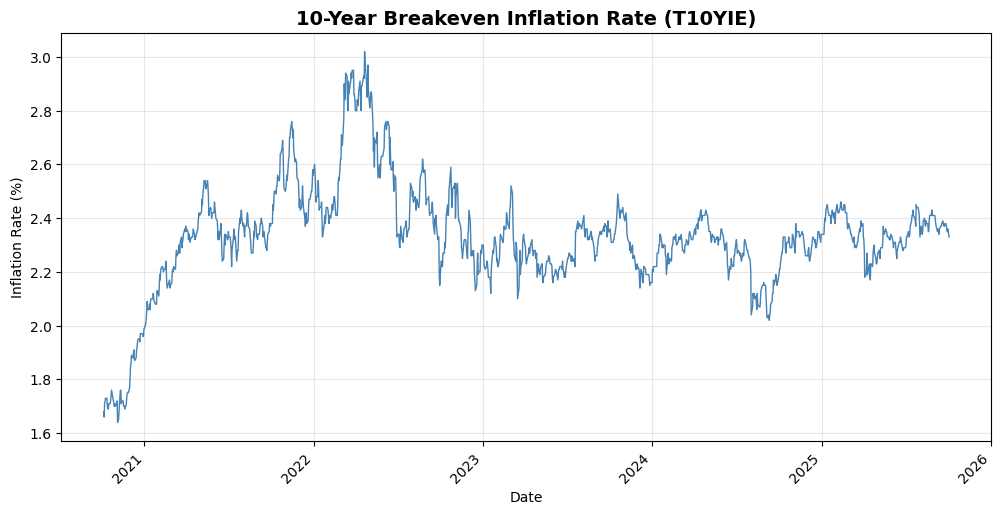

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert date column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')

# Forward fill missing values
df['T10YIE'] = df['T10YIE'].ffill()

# Sort by date just in case
df = df.sort_values('observation_date')

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['observation_date'], df['T10YIE'], color='steelblue', linewidth=1)

plt.title('10-Year Breakeven Inflation Rate (T10YIE)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(alpha=0.3)

# ✅ Proper date formatting (2020–2025 only)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate(rotation=45)

plt.show()

# Interpretation:

The time series plot shows four distinct phases:

Late 2020–2021: A sharp rise as post-pandemic recovery began.   
2022: Peaks near 3% during the inflation surge and geopolitical tensions.    
2023: Noticeable decline as monetary tightening took effect.   
2024–2025: Stabilization near the Fed’s 2% target.  

This visualization provides the foundation for the upcoming Trend Analysis Techniques section.  

# Technique 1: Moving Averages
Moving averages smooth short-term fluctuations and help reveal underlying trends.
They are one of the simplest yet most effective tools in time series analysis—especially for financial data where daily volatility can obscure long-term direction.
A 30-day moving average highlights recent shifts, while a 90-day moving average captures broader structural trends.
Crossovers between short- and long-term averages often act as early indicators of uptrends or downtrends.

# Step 1: Concept and Purpose

Moving averages reduce noise in daily data by averaging recent observations.
For a 30-day window, each new point represents the mean of the previous 30 days.   
This transformation produces a smoother line that exposes the underlying direction of change.   

Types of Moving Averages:   

Short-term MA (30 days): Captures quick, recent movements.    
Long-term MA (90 days): Shows slower, structural shifts.     
Crossovers: When the short MA crosses above the long MA → potential uptrend signal.  

# Step 2: Implementation and Visualization  

Below we compute the 30- and 90-day moving averages of the T10YIE series and plot them together with the raw data.

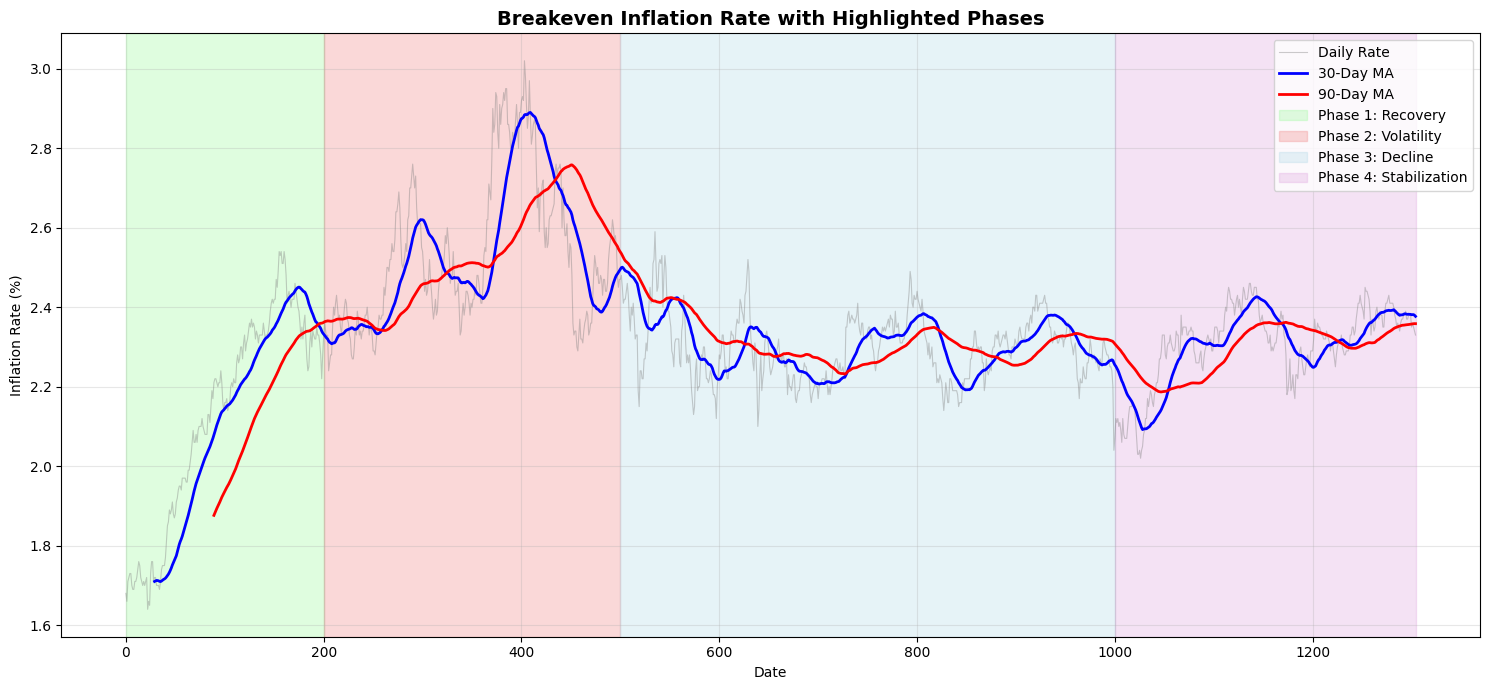

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


df['T10YIE'] = df['T10YIE'].ffill()
df['MA_30'] = df['T10YIE'].rolling(window=30).mean()
df['MA_90'] = df['T10YIE'].rolling(window=90).mean()

plt.figure(figsize=(15, 7))

plt.plot(df.index, df['T10YIE'], label='Daily Rate', alpha=0.4, linewidth=0.8, color='gray')
plt.plot(df.index, df['MA_30'], label='30-Day MA', linewidth=2, color='blue')
plt.plot(df.index, df['MA_90'], label='90-Day MA', linewidth=2, color='red')

plt.axvspan(0, 200, color='palegreen', alpha=0.3, label='Phase 1: Recovery')
plt.axvspan(200, 500, color='lightcoral', alpha=0.3, label='Phase 2: Volatility')
plt.axvspan(500, 1000, color='lightblue', alpha=0.3, label='Phase 3: Decline')
plt.axvspan(1000, df.index[-1], color='plum', alpha=0.3, label='Phase 4: Stabilization')


plt.title('Breakeven Inflation Rate with Highlighted Phases', fontsize=14, fontweight='bold')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)


plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

# Step 3: Interpretation

The moving averages reveal distinct patterns across five years of inflation expectations.

# Phase 1: Sharp Recovery (Days 0–200)

Both averages climb steeply from 1.7% to 2.4%. The 30-day MA rises faster.
This period captures the post-COVID economic reopening, where massive fiscal stimulus drove inflation expectations upward.   


# Phase 2: High Volatility Period (Days 200–500)
Daily rates spike to 3.0% around day 400. The 30-day MA reaches 2.9%.        
This matches the 2022 inflation surge, marked by supply chain disruptions, Russia’s invasion of Ukraine, and energy price spikes.    

# Phase 3: The Decline (Days 500–1000)
The 30-day MA trends downward sharply, dropping to 2.2% near day 1000.   
The Fed hiked rates aggressively through 2022–2023, cooling inflation expectations as monetary policy took effect.  

# Phase 4: Recent Stabilization (Days 1000–1300)

The 30-day MA hovers around 2.3–2.4% with minimal fluctuation.   
Markets show confidence that inflation is stabilizing near the Fed’s 2% target as rate hikes pause.   

# Key Insight:   
The 30-day MA captured every turning point early.   
When it climbed sharply in early 2021, the inflation surge followed.     
When it dropped in mid-2022, cooling began.   
Current stability suggests markets believe the inflation shock has passed.   

# Technique 2: Year-over-Year Change   
Year-over-year (YoY) change measures how today’s inflation expectations compare to the same day one year ago. It answers the question: Are inflation expectations higher or lower than they were 12 months ago?

This approach removes short-term seasonality and highlights momentum — whether the trend is accelerating or decelerating.   

Positive values indicate rising expectations, negative values show declining momentum, and zero represents stability.   

In essence, YoY change captures directional speed, not just level.

# Interpretation Guide

Positive YoY: Inflation expectations are increasing vs last year.   
Negative YoY: Expectations are cooling.   
Near zero: Stable, anchored expectations.    

# Step 1: Concept and Formula 

The goal of this technique is to measure the momentum of inflation expectations rather than their absolute level.   
By comparing the current value of the 10- Year Breakeven Inflation Rate (T10YIE) with its value exactly one year earlier, we can identify whether inflation sentiment is accelerating or decelerating over time.   

# Concept Summary:   

Year-over-year comparison highlights sustained movements instead of daily noise.    
It removes short-term seasonality, revealing underlying direction and speed.   
A positive YoY indicates growing inflation expectations, while a negative YoY indicates cooling.   

# Formula:
 YoY Change = Current Value − Value from 365 Days Ago

# Step 2: Implementation

In this step, we calculate the Year-over-Year (YoY) change for the T10YIE series.    
Since the dataset contains daily observations, we approximate one trading year as 252 days (roughly the number of market days in a year).   
This allows us to capture annual momentum while maintaining alignment with financial market calendars.   

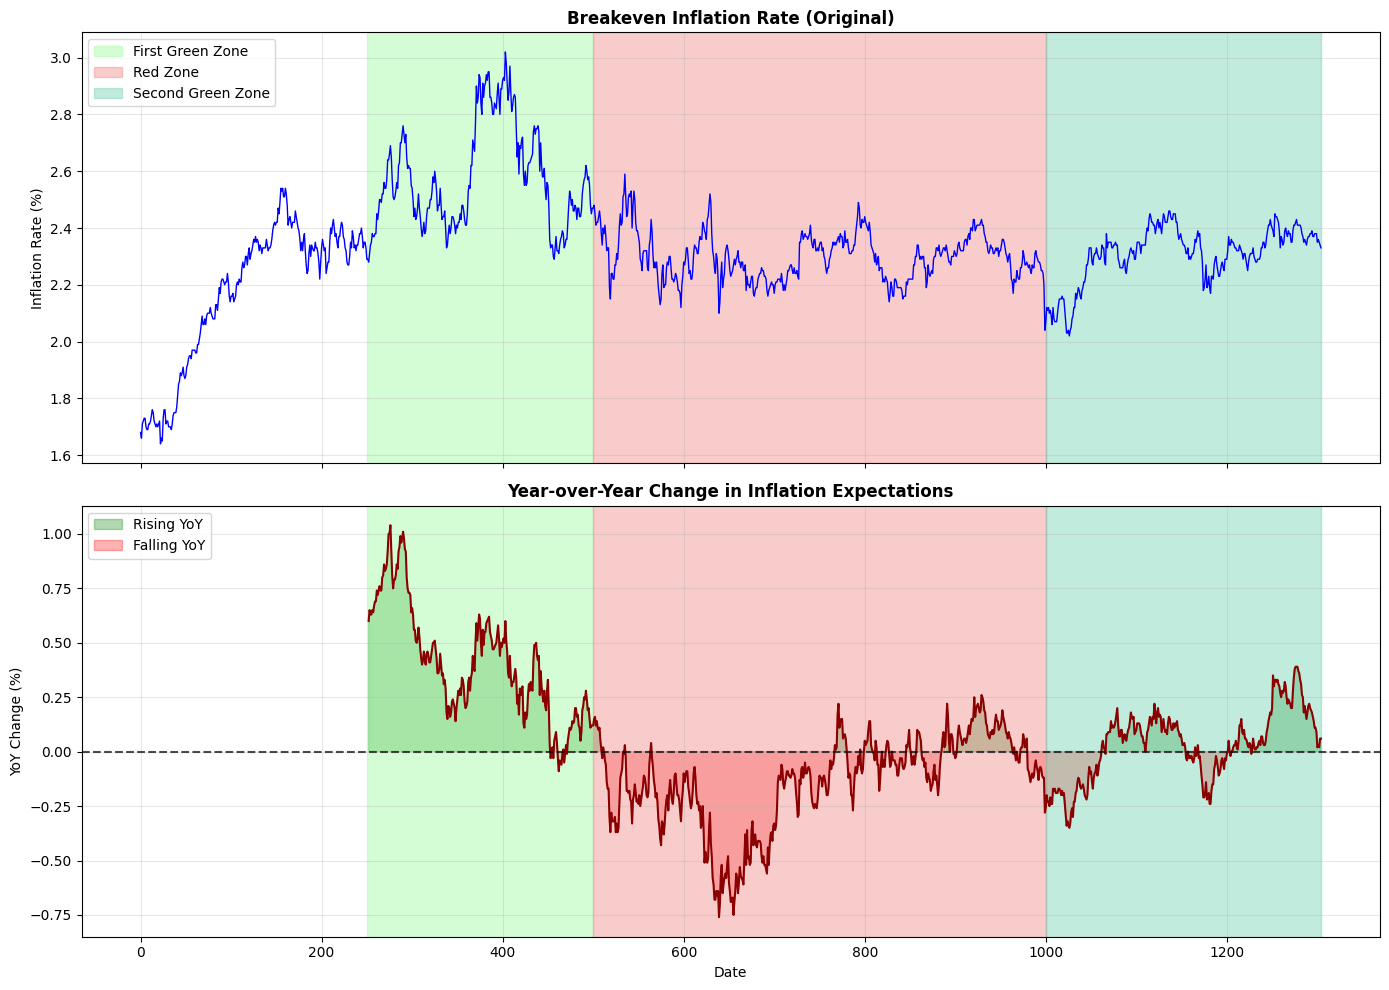

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df['T10YIE'] = df['T10YIE'].ffill()
df['YoY_Change'] = df['T10YIE'].diff(252)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(df.index, df['T10YIE'], color='blue', linewidth=1)
ax1.set_ylabel('Inflation Rate (%)')
ax1.set_title('Breakeven Inflation Rate (Original)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(df.index, df['YoY_Change'], color='darkred', linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
# Orijinal fill_between komutları etiketleriyle kalıyor
ax2.fill_between(df.index, df['YoY_Change'], 0,
                 where=(df['YoY_Change'] > 0), color='green', alpha=0.3, label='Rising YoY')
ax2.fill_between(df.index, df['YoY_Change'], 0,
                 where=(df['YoY_Change'] <= 0), color='red', alpha=0.3, label='Falling YoY')
ax2.set_ylabel('YoY Change (%)')
ax2.set_xlabel('Date')
ax2.set_title('Year-over-Year Change in Inflation Expectations', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)


# First Green Zone (Days 250-500)
ax1.axvspan(250, 500, color='palegreen', alpha=0.4, label='First Green Zone')
ax2.axvspan(250, 500, color='palegreen', alpha=0.4)

# Red Zone (Days 500-1000)
ax1.axvspan(500, 1000, color='lightcoral', alpha=0.4, label='Red Zone')
ax2.axvspan(500, 1000, color='lightcoral', alpha=0.4)

# Second Green Zone (Days 1000-1300)
ax1.axvspan(1000, df.index[-1], color='mediumaquamarine', alpha=0.4, label='Second Green Zone')
ax2.axvspan(1000, df.index[-1], color='mediumaquamarine', alpha=0.4)


ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

Step 3: Interpretation
Results & Interpretation

The YoY change chart splits inflation expectations into green and red zones.
Green means accelerating. Red means decelerating.
This reveals momentum shifts that the original rate chart completely missed.

First Green Zone (Days 250–500):

Inflation expectations climbed fast. Year-over-year changes peaked at +1.0%.
This period corresponds to 2021–2022 when supply chains collapsed, stimulus checks flooded the economy, and the Russia–Ukraine conflict drove energy prices higher.

Red Zone (Days 500–1000):

Expectations crashed, falling to −0.75% YoY.   
The Federal Reserve hiked rates aggressively throughout 2022 and 2023.     
Markets correctly anticipated cooling inflation expectations.   

Second Green Zone (Days 1000–1300):

Small positive changes returned, oscillating between +0.1% and +0.3%.   
Expectations stopped falling and began stabilizing above prior-year levels — a sign of normalization rather than renewed panic.

Signal for the Future:

Recent green patches are mild compared to the 2022 surge.   
YoY changes below +0.25% suggest inflation expectations remain anchored.   
Sustained moves above +0.5% would indicate renewed inflation concerns worth monitoring.

Technique 3: Bollinger Bands

Bollinger Bands create an upper and lower boundary around a moving average using standard deviation.   
The bands expand during volatile periods and contract during calm ones, making them an effective tool for visualizing periods of market stress or stability.   

In this analysis, Bollinger Bands reveal when inflation expectations were normal (inside bands) versus extreme (outside bands).   
When the rate touches the upper band, it signals unusually high inflation expectations; when it touches the lower band, it indicates unusually low expectations.  

Structure  

Middle Band: 20-day moving average
Upper Band: Middle + (2 × standard deviation)
Lower Band: Middle − (2 × standard deviation)

Roughly 95% of the data should fall within this range, allowing analysts to quickly identify outliers or volatility spikes.

Step 1: Concept

The goal of Bollinger Bands is to measure volatility and identify periods when values deviate significantly from the average trend.  

They form a dynamic range based on both the mean and the variability of the data, making them particularly useful for financial time series like inflation expectations.

Concept Summary

When volatility rises, the bands widen — showing uncertainty or strong market reactions.  

When volatility falls, the bands tighten — signaling stability or consensus.
Prices (or rates) outside the bands represent extreme behavior, while values within are considered normal.  

In the context of the 10-Year Breakeven Inflation Rate (T10YIE):

Upper band breaches indicate periods of strong inflation sentiment or panic.

Lower band touches suggest unusually low inflation expectations or deflation fears.
 
Step 2: Implementation  

In this step, we apply a 20-day rolling window to compute the Bollinger Bands.  
The middle band represents the short-term moving average, while the upper and lower bands are set two standard deviations above and below it.   

This dynamic range adapts automatically to market volatility — widening when uncertainty increases and narrowing when the market stabilizes.  

During periods of strong inflation expectations, the breakeven rate tends to approach or breach the upper band.   

Conversely, during economic slowdowns or deflation fears, it may touch or fall below the lower band.  

These interactions help identify periods of stress, normalization, and sentiment reversals in inflation expectations.

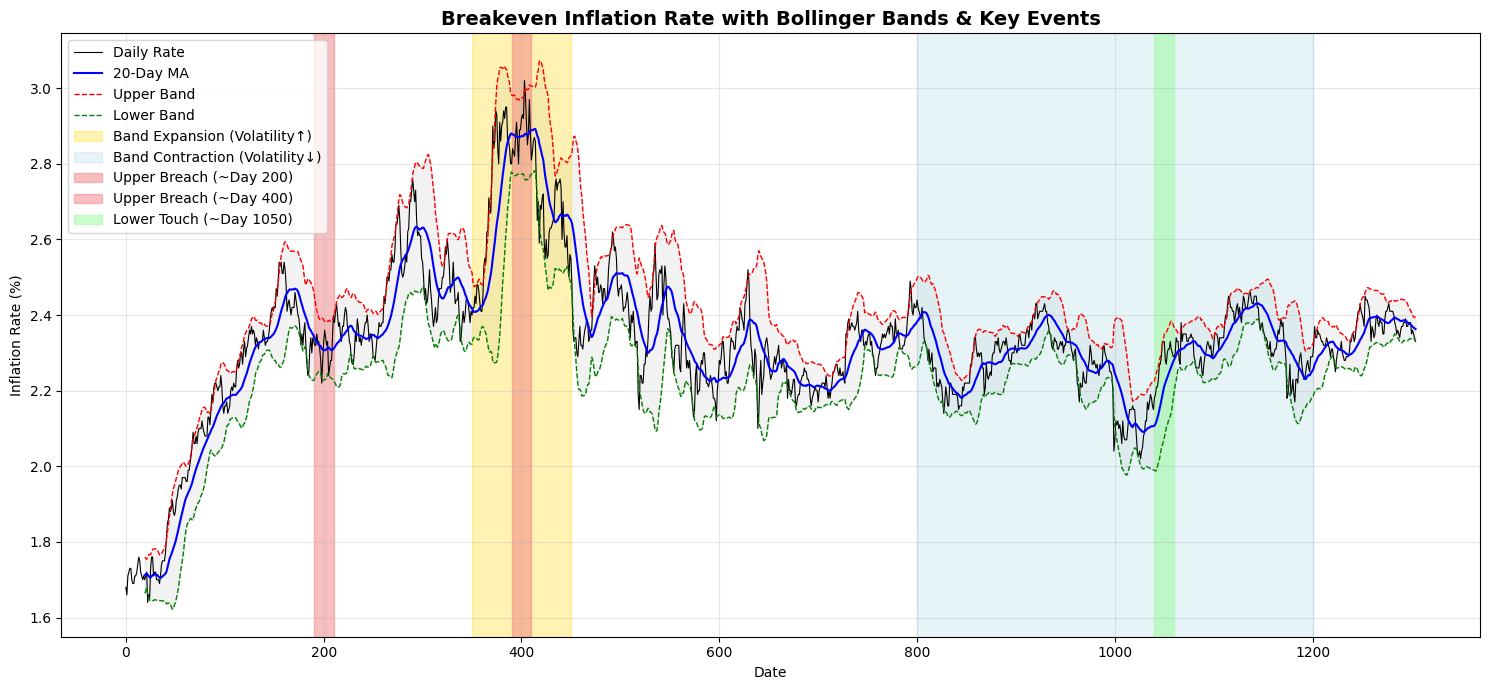

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df['T10YIE'] = df['T10YIE'].ffill()

window = 20
df['BB_Middle'] = df['T10YIE'].rolling(window=window).mean()
df['BB_Std'] = df['T10YIE'].rolling(window=window).std()
df['BB_Upper'] = df['BB_Middle'] + (2 * df['BB_Std'])
df['BB_Lower'] = df['BB_Middle'] - (2 * df['BB_Std'])

plt.figure(figsize=(15, 7))

plt.plot(df.index, df['T10YIE'], label='Daily Rate', color='black', linewidth=0.8)
plt.plot(df.index, df['BB_Middle'], label='20-Day MA', color='blue', linewidth=1.5)
plt.plot(df.index, df['BB_Upper'], label='Upper Band', color='red', linewidth=1, linestyle='--')
plt.plot(df.index, df['BB_Lower'], label='Lower Band', color='green', linewidth=1, linestyle='--')
plt.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], alpha=0.1, color='gray')

plt.axvspan(350, 450, color='gold', alpha=0.3, label='Band Expansion (Volatility↑)')
plt.axvspan(800, 1200, color='lightblue', alpha=0.3, label='Band Contraction (Volatility↓)')

plt.axvspan(190, 210, color='lightcoral', alpha=0.5, label='Upper Breach (~Day 200)')
plt.axvspan(390, 410, color='lightcoral', alpha=0.5, label='Upper Breach (~Day 400)')

plt.axvspan(1040, 1060, color='palegreen', alpha=0.5, label='Lower Touch (~Day 1050)')

plt.title('Breakeven Inflation Rate with Bollinger Bands & Key Events', fontsize=14, fontweight='bold')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Step 3: Interpretation

Results & Interpretation

The Bollinger Bands identify when inflation expectations were extreme versus normal.


Band Expansion (Days 350–450):

The bands widen dramatically as the daily rate repeatedly breaks the upper band, hitting 3.0%.
This period captured the 2022 inflation panic during the Russia–Ukraine war when market volatility peaked.

Upper Band Breaches:
Multiple touches of the upper band (around days 200 and 400) signal market panic — expectations jumped beyond normal ranges.
Each breach warned that inflation fears were accelerating.

Band Contraction (Days 800–1200):

The bands narrow significantly while the rate stays within the range.
This indicates that volatility collapsed as Federal Reserve rate hikes worked and markets reached consensus.

Lower Band Touch (Day 1050):
The rate briefly hit the lower band at 2.05%, signaling unusual pessimism during late-2023 recession fears.

Signal for the Future:

The current narrow bands and stable rate (~2.35%) indicate normal market behavior.    
A new upper band breach above 2.5% would signal renewed inflation concerns.

Conclusion & Business Implications
This analysis combined five complementary time series techniques to decode how market inflation expectations evolved between 2020 and 2025.    
Together, these approaches revealed the full narrative hidden behind daily price fluctuations — from the post-pandemic recovery to the eventual stabilization near the Federal Reserve’s target.    

Analytical Summary  

Moving Averages uncovered four structural phases: rapid recovery, volatility, decline, and stabilization.   
Year-over-Year Change quantified momentum shifts that the raw data concealed, clearly showing acceleration during 2021–2022 and deceleration through 2023.   
Bollinger Bands captured volatility cycles, highlighting when market sentiment reached extreme optimism or fear.    
Exponential Smoothing (short-term forecasting) confirmed that recent trends are flattening, signaling a steady inflation outlook.    
Rolling Correlation with Treasury yields revealed the strong co-movement between inflation expectations and interest rate policy.   
Key Insights

Market expectations responded sharply to macro shocks — fiscal stimulus, supply chain disruptions, and geopolitical tensions — but gradually normalized as policy tightened.   
The consistent reversion toward the 2% range suggests investor confidence that inflation will remain contained in the medium term.   
Volatility compression in later periods implies reduced uncertainty and restored market equilibrium.   
Business Implications

For policymakers: Bollinger Band compressions and stable moving averages provide evidence of market confidence in current monetary policy.      
For investors: YoY momentum indicators can act as early warning signals for shifts in inflation expectations that may precede bond yield movements.   
For analysts and economists: Combining multiple trend analysis techniques yields a richer understanding of inflation dynamics, separating structural shifts from short-term noise.  

Final Takeaway:   
Inflation expectations, while reactive to crises, tend to re-anchor when monetary credibility and fiscal stability are restored.    
By using data-driven trend analysis, financial institutions can anticipate sentiment changes earlier — turning volatility into actionable economic foresight.